In [20]:
from train import init_experiment, get_decoder, get_vocab
import torch
import dataset
import vocab
import sys
import matplotlib.pyplot as plt
import plotting


def get_sample_images_captions_predictions(data_loader, encoder, decoder, n, lang, end_token, device, max_len):
    sample_images = []
    sample_captions = []
    sample_predictions = []
    counter = 0
    for batch in data_loader:
        images, captions = batch
        features  = encoder.encode_image(images.to(device)   ).unsqueeze(1).float()
        predictions = decoder.Predict(  features , max_len=max_len, end_token=end_token)
        sample_images.append(images[0])
        sample_captions.append(vocab.indices_to_caption(captions[0].tolist(), lang=lang))
        sample_predictions.append(vocab.indices_to_caption(predictions, lang=lang))
        counter += 1
        if counter == n:
            break
    return sample_images, sample_captions, sample_predictions

if __name__ == '__main__':
    # read expriement name from command line argument
    # python inference.py clip-rnn-ar checkpoints\rnn-ar-hd512-6-.ckpt 5
    params = init_experiment('clip-rnn-ar')
    checkpoint = 'checkpoints/rnn-ar-hd512-6-.ckpt'
    n=10

    lang = params['lang']
    embed_size = params['embed_size']
    hidden_size = params['hidden_size']
    num_layers = params['num_layers']
    lr = params['lr']
    clip_model = params['clip_model']
    model_dir = params['model_dir']

    batch_size = 1
    use_checkpoint = True
    max_len = 5
    if lang == 'en':
        end_token = vocab.word2idx_english['<end>']
    if lang == 'ar':
        end_token = vocab.word2idx_arabic['<end>']

    device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    vocab_size = get_vocab(lang)

    encoder, data_loader_train = dataset.get_loader_f8k(lang, batch_size, clip_model=clip_model, device=device)
    encoder.eval()    
    decoder, start_epoch = get_decoder(embed_size, hidden_size, vocab_size, num_layers, checkpoint=checkpoint, use_checkpoint=use_checkpoint, device=device)
    decoder.to(device)
    decoder.eval()

{
    "batch_size": 128,
    "checkpoint": "",
    "clip_model": "ViT-B/16",
    "embed_size": 512,
    "hidden_size": 512,
    "lang": "ar",
    "lr": 0.01,
    "model_dir": "./checkpoints",
    "model_name": "rnn-ar-hd512",
    "num_epochs": 60,
    "num_layers": 1,
    "print_every": 10,
    "save_every": 1,
    "use_checkpoint": false
}


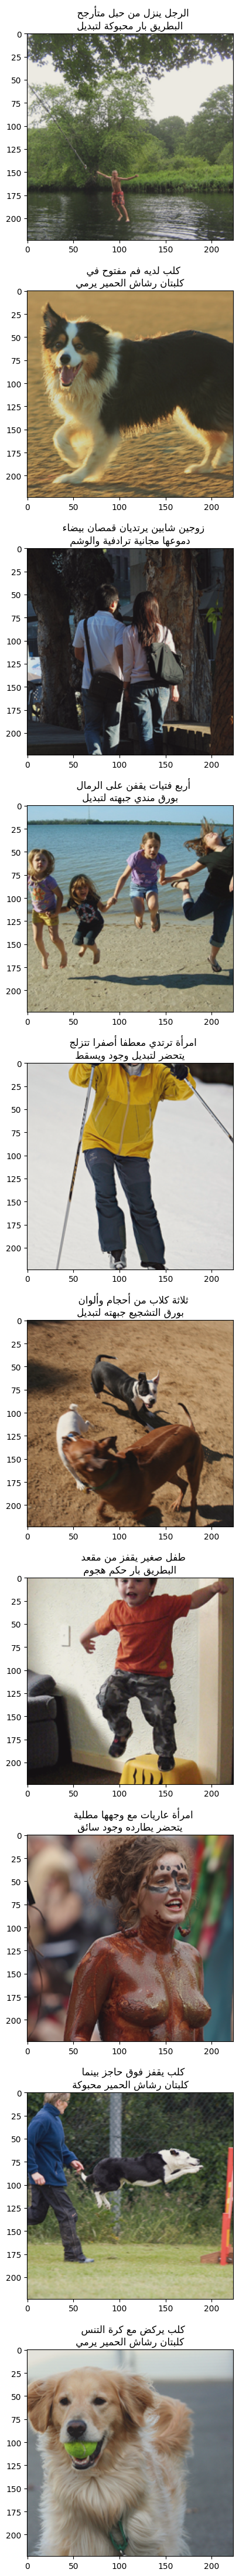

In [21]:

sample_images, sample_captions, sample_predictions = get_sample_images_captions_predictions(data_loader_train, encoder, decoder, n, lang, end_token, device, max_len=max_len)




fig, axes = plt.subplots(figsize=(44,44), nrows=n)
for i in range(n):
    ax = axes[i]
    title = f'{sample_captions[i]} \n {sample_predictions[i]}'
    plotting.imshow(sample_images[i], title=title, ax=ax, ar=True)
plt.tight_layout()
plt.show()